## **Оглавление:** 
- [Шаг 1. Откроем файлы с данными и изучим общую информацию](#id-section1)<div id='id-section25'/>
- [Вывод](#id-section2)<div id='id-section26'/>


- [Шаг 2. Подготовим данные к анализу](#id-section3)<div id='id-section27'/>
- [Переименуем столбцы](#id-section4)<div id='id-section28'/>
- [Приведем данные к нужному типу](#id-section5)<div id='id-section29'/>
- [Обработаем дубликаты](#id-section6)<div id='id-section30'/>
- [Вывод](#id-section7)<div id='id-section31'/>


- [Шаг 3. Построим отчеты и посчитаем метрики по продукту](#id-section8)<div id='id-section32'/>
- [Определим, сколько людей пользуются продуктом в день, неделю, месяц](#id-section9)<div id='id-section33'/>
- [Найдем количество сессий в день](#id-section10)<div id='id-section34'/>
- [Найдем продолжительность одной сессии (метрика ASL)](#id-section11)<div id='id-section35'/>
- [Вычислим, как часто пользователи возвращаются (метрика Retention Rate)](#id-section12)<div id='id-section36'/>
- [Вывод](#id-section13)<div id='id-section37'/>


- [Шаг 4. Построим отчеты и посчитаем метрики по продажам](#id-section14)<div id='id-section38'/>
- [Выясним, когда люди начинают покупать и сколько раз покупают за период](#id-section15)<div id='id-section39'/>
- [Определим величину среднего чека](#id-section16)<div id='id-section40'/>
- [Посчитаем, сколько денег приносят пользователи (метрика LTV)](#id-section17)<div id='id-section41'/>
- [Вывод](#id-section18)<div id='id-section42'/>


- [Шаг 5. Построим отчеты и посчитаем метрики по маркетингу](#id-section19)<div id='id-section43'/>
- [Вычислим, сколько денег потратили маркетологи: всего / на каждый рекламный источник / по времени](#id-section20)<div id='id-section44'/>
- [Найдем стоимость привлечения одного покупателя из каждого источника (метрика CAC)](#id-section21)<div id='id-section45'/>
- [Посчитаем, на сколько окупились расходы на рекламные источники (метрика ROMI)](#id-section22)<div id='id-section46'/>
- [Вывод](#id-section23)<div id='id-section47'/>


- [Шаг 6. Общий вывод](#id-section24)<div id='id-section48'/>

<div id='id-section1'/>

## [Шаг 1. Откроем файлы с данными и изучим общую информацию](#id-section25)

Импортируем необходимые библиотеки.

Для вывода данных методы `head()` и `tail()` применять не будем, потому что Jupyter и так выведет на экран первые и последние 5 строк из длинных таблиц.

Также сразу посмотрим, какие типы данных хранятся в таблицах, воспользуемся методом `info()`.

In [291]:
from IPython.display import display
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

visits = pd.read_csv('/datasets/visits_log.csv')
orders = pd.read_csv('/datasets/orders_log.csv')
costs = pd.read_csv('/datasets/costs.csv')

tables = [visits, orders, costs]
for table in tables:
    display(table)
    table.info()

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168
...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450
...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624
50411,2018-05-31 23:50:00,5.80,11369640365507475976
50412,2018-05-31 23:54:00,0.30,1786462140797698849
50413,2018-05-31 23:56:00,3.67,3993697860786194247


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08
...,...,...,...
2537,10,2018-05-27,9.92
2538,10,2018-05-28,21.26
2539,10,2018-05-29,11.32
2540,10,2018-05-30,33.15


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


<div id='id-section2'/>

### [Вывод](#id-section26)

Таблица `visits` - это самый большой массив данных, в нем хранится 359,4 тыс. строк. Пропущенных значений в таблице нет. Категориальные переменные `Device`, `Source Id` имеют тип данных `object` и `int64`, а переменная `Uid` с типом данных `uint64` - это корректно. Переменные `End Ts` и `Start Ts`, содержащие дату и время начала и окончания сессии, должны иметь тип данных `datetime`, а не `object`.

В таблице `orders` хранится 50,4 тыс. строк. Пропущенных значений нет. Количественная переменная `Revenue` (выручка Яндекс.Афиши заказа) с дробным типом `float64`, переменная `Uid` с типом данных `uint64` - корректно. Переменная `Buy Ts` (дата и время заказа) должна иметь тип данных `datetime`, а не `object`.

В таблице `costs` 2,5 тыс. строк. Пропущенных значений нет. Категориальная переменная `source_id` имеет тип данных `int64`, а количественная переменная `costs` (затраты на рекламный источник в день) с типом `float64` - это корректно. Переменная `dt` (дата) должна иметь тип данных `datetime`, а не `object`.

Также мы заметили, что первые две таблицы имеют неудобные названия столбцов - с пробелами и заглавными буквами, обращаться к таким переменным будет не очень удобно. Имеет смысл сделать все названия без пробелов и со строчными буквами. 

<div id='id-section3'/>

## [Шаг 2. Подготовим данные к анализу](#id-section27)

<div id='id-section4'/>

### [Переименуем столбцы](#id-section28)

Методом `lower()` преобразуем буквы в названиях на строчные, а методом `replace()` заменим пробелы на нижнее подчеркивание. Напишем функцию и применим ее сразу ко всем таблицам из переменной `tables`, которую мы объявили на **Шаге 1**. + Выполним проверку.

In [292]:
def lowrep(df):
    df.columns = [col.lower().replace(' ','_') for col in df.columns]

for table in tables:
    lowrep(table)
    display(table.columns)

Index(['device', 'end_ts', 'source_id', 'start_ts', 'uid'], dtype='object')

Index(['buy_ts', 'revenue', 'uid'], dtype='object')

Index(['source_id', 'dt', 'costs'], dtype='object')

<div id='id-section5'/>

### [Приведем данные к нужному типу](#id-section29)

Во всех трех таблицах есть переменные, обозначающие дату и время совершения каких-либо событий. У них должен быть тип данных `datetime`. Напишем функцию, которая методом `pd.to_datetime()` переведет столбец в нужный формат. Затем выпишем отдельно все таблицы и столбцы, которые надо обработать, и для каждого элемента из списка применим функцию. + Выполним проверку. 

In [293]:
def datetime(df, column):
    df[column] = pd.to_datetime(df[column], format = '%Y-%m-%dT%H:%M:%S')

tables_columns = [[visits, 'end_ts'], [visits, 'start_ts'], [orders, 'buy_ts'], [costs, 'dt']]    

for table in tables_columns:
    datetime(table[0], table[1])
    table[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   device     359400 non-null  object        
 1   end_ts     359400 non-null  datetime64[ns]
 2   source_id  359400 non-null  int64         
 3   start_ts   359400 non-null  object        
 4   uid        359400 non-null  uint64        
dtypes: datetime64[ns](1), int64(1), object(2), uint64(1)
memory usage: 13.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   device     359400 non-null  object        
 1   end_ts     359400 non-null  datetime64[ns]
 2   source_id  359400 non-null  int64         
 3   start_ts   359400 non-null  datetime64[ns]
 4   uid        359400 non-null  uint64        
dtypes: datetime64[ns](2), 

<div id='id-section6'/>

### [Обработаем дубликаты](#id-section30)

На всякий случай поищем дубликаты в таблицах методом `duplicated().sum()`, что позволит нам посчитать общее количество дубликатов. Таблицы переберем в цикле из переменной `tables`, которую мы объявили на **Шаге 1**.

In [294]:
for table in tables:
    display(table.duplicated().sum())

0

0

0

<div id='id-section7'/>

### [Вывод](#id-section31)

На данном этапе мы:
- убрали из названий столбцов пробелы и заглавные буквы;
- перевели переменные, обозначающие дату и время, к типу `datetime`;
- убедились, что дубликаты в таблицах отсутствуют.

<div id='id-section8'/>

## [Шаг 3. Построим отчеты и посчитаем метрики по продукту](#id-section32)

<div id='id-section9'/>

### [Определим, сколько людей пользуются продуктом в день, неделю, месяц](#id-section33)

Для уникальных пользователей рассчитаем **3 метрики-измерения:**
- **DAU** - количество уникальных пользователей в день,
- **WAU** - количество уникальных пользователей в неделю,
- **MAU** - количество уникальных пользователей в месяц.

Также посчитаем регулярность использования продукта - то, как часто пользователи к нему обращаются, - через метрику **sticky factor** в зависимости от количества пользователей в неделю и месяц.

Чтобы посчитать недельное и месячное использование, выделим в отдельные столбцы таблицы `visits` год, месяц и неделю, а также полную дату.

In [295]:
display(visits.head())

,device,end_ts,source_id,start_ts,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [296]:
visits['session_year']  = visits['start_ts'].dt.year
visits['session_month'] = visits['start_ts'].dt.month
visits['session_week']  = visits['start_ts'].dt.week
visits['session_date'] = visits['start_ts'].dt.date

Посчитаем все метрики по каждому типу устройств из `device`. Сгруппируем данные в таблице `visits` по уникальным пользователям и найдем среднее:

In [297]:
parameters = [
    {'df': visits.query('device == "touch"')},
    {'df': visits.query('device == "desktop"')}
]

def metriki(parameter):
    dau_total = parameter.get('df').groupby('session_date').agg({'uid': 'nunique'}).mean()
    wau_total = parameter.get('df').groupby(['session_year', 'session_week']).agg({'uid': 'nunique'}).mean()
    mau_total = parameter.get('df').groupby(['session_year', 'session_month']).agg({'uid': 'nunique'}).mean()
    sticky_mau = (dau_total / mau_total) * 100
    sticky_wau = (dau_total / wau_total) * 100
    display('Количество уникальных пользователей в день: ' + str(int(dau_total)), \
        'Количество уникальных пользователей в неделю: ' + str(int(wau_total)), \
        'Количество уникальных пользователей в месяц: ' + str(int(mau_total)), \
        'sticky factor за неделю: ' + str(sticky_wau), \
        'sticky factor за месяц: ' + str(sticky_mau))  
    
for parameter in parameters:
    metriki(parameter)

'Количество уникальных пользователей в день: 252'

'Количество уникальных пользователей в неделю: 1634'

'Количество уникальных пользователей в месяц: 6825'

'sticky factor за неделю: uid    15.46697\ndtype: float64'

'sticky factor за месяц: uid    3.704605\ndtype: float64'

'Количество уникальных пользователей в день: 659'

'Количество уникальных пользователей в неделю: 4129'

'Количество уникальных пользователей в месяц: 16724'

'sticky factor за неделю: uid    15.964233\ndtype: float64'

'sticky factor за месяц: uid    3.941691\ndtype: float64'

Пользователей `desktop` версии больше, чем пользователей `touch`. 

Однако метрики `sticky factor` практически не отличаются от типа устройства. **`sticky factor` за месяц** очень низкий - около 4%. Это говорит о том, что пользователи не задерживаются в приложении и на сайте. Необходимо принять меры, чтобы увеличить этот показатель, например, ввести пуш-уведомления или обновить приложение и сайт, предложив новые функции.

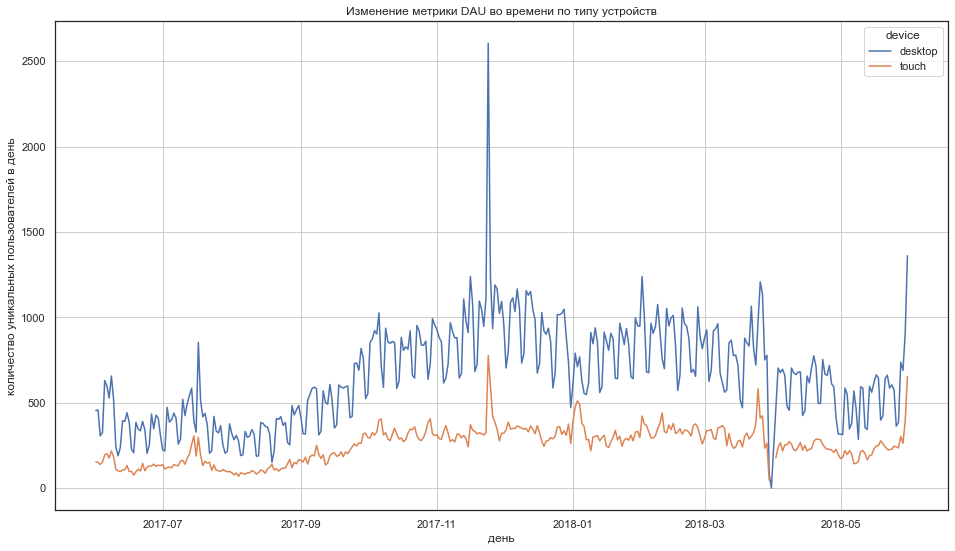

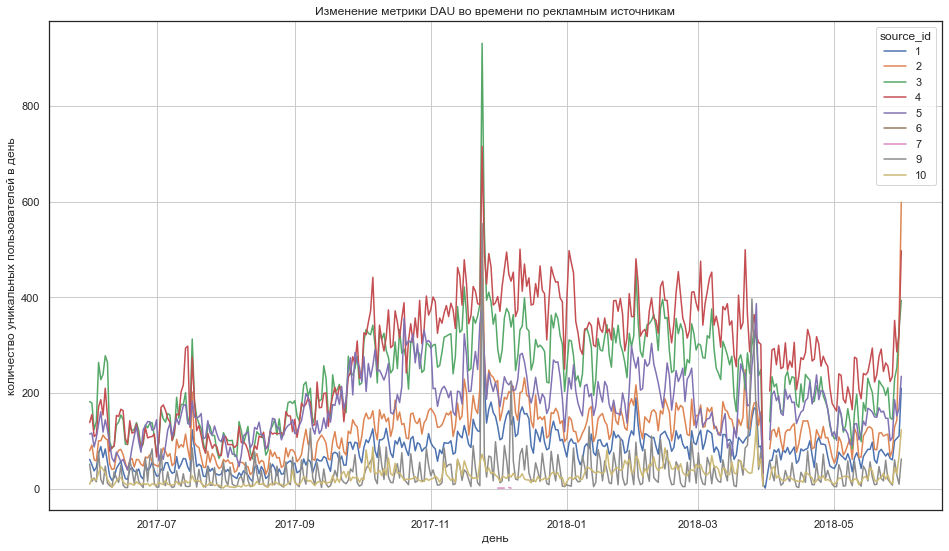

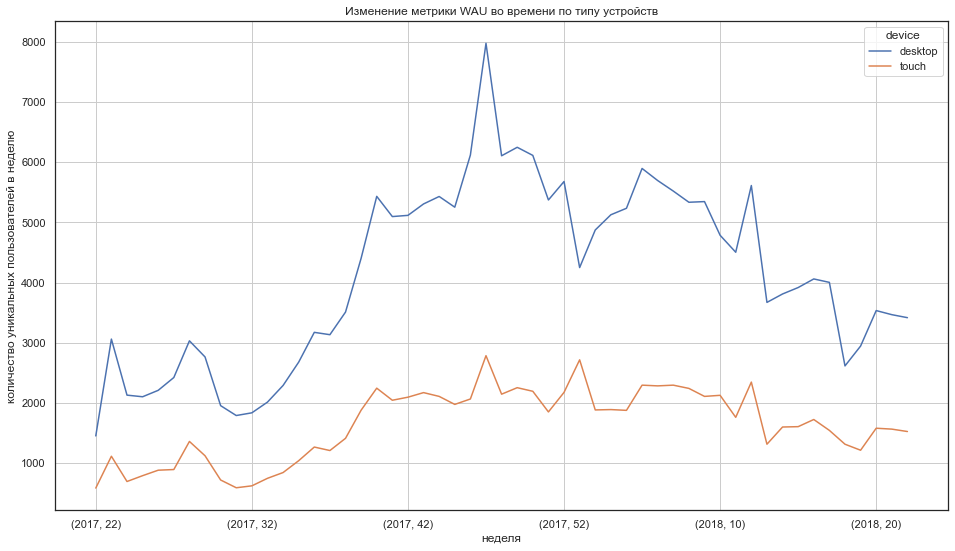

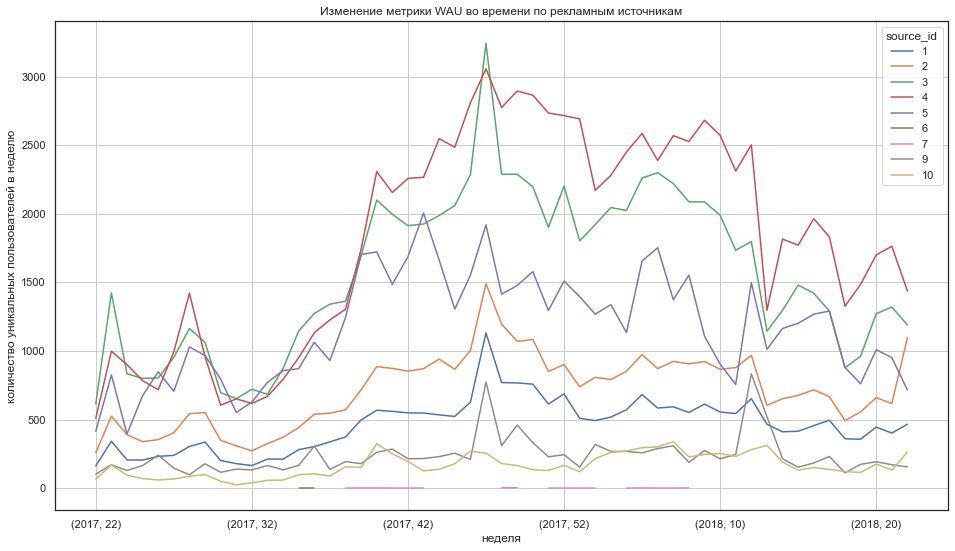

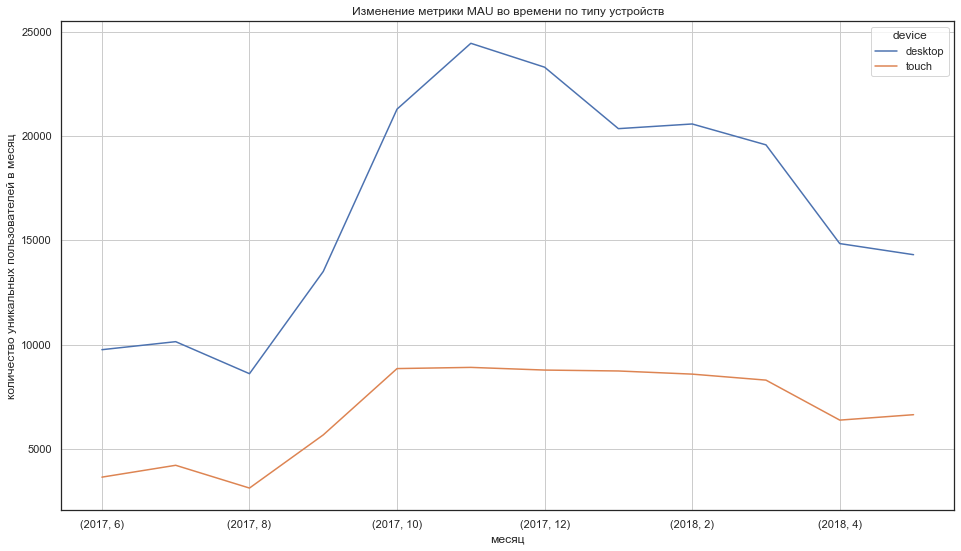

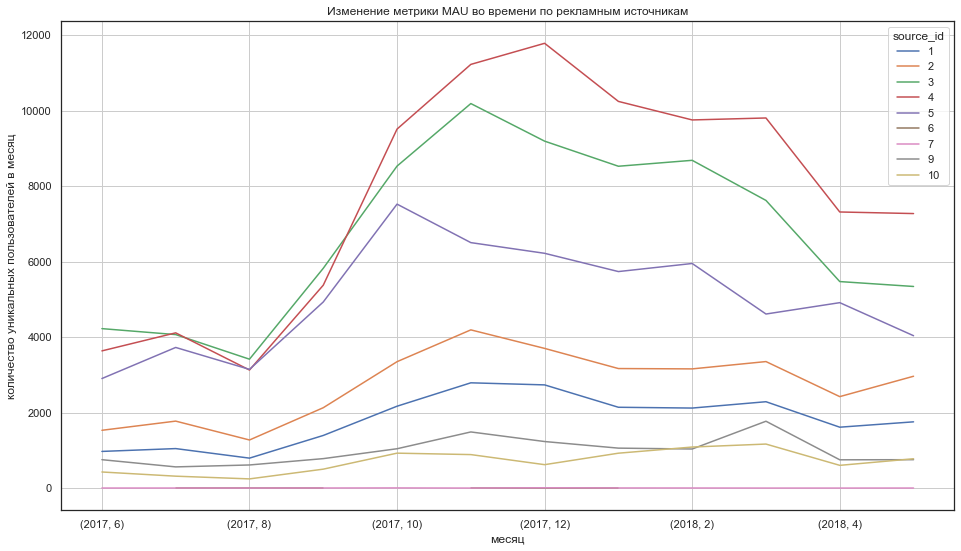

In [298]:
parameters = [
    {
     'index': 'session_date',
     'columns': 'device',
     'title': 'Изменение метрики DAU во времени по типу устройств',
     'xlabel': 'день',
     'ylabel': 'количество уникальных пользователей в день'
    },
    {
     'index': 'session_date',
     'columns': 'source_id',
     'title': 'Изменение метрики DAU во времени по рекламным источникам',
     'xlabel': 'день',
     'ylabel': 'количество уникальных пользователей в день'         
    },
    {
     'index': ['session_year', 'session_week'],
     'columns': 'device',
     'title': 'Изменение метрики WAU во времени по типу устройств',
     'xlabel': 'неделя',
     'ylabel': 'количество уникальных пользователей в неделю'     
    },
    {
     'index': ['session_year', 'session_week'],
     'columns': 'source_id',
     'title': 'Изменение метрики WAU во времени по рекламным источникам',
     'xlabel': 'неделя',
     'ylabel': 'количество уникальных пользователей в неделю'    
    },
    {
     'index': ['session_year', 'session_month'],
     'columns': 'device',
     'title': 'Изменение метрики MAU во времени по типу устройств',
     'xlabel': 'месяц',
     'ylabel': 'количество уникальных пользователей в месяц'    
    },
    {
     'index': ['session_year', 'session_month'],
     'columns': 'source_id',
     'title': 'Изменение метрики MAU во времени по рекламным источникам',
     'xlabel': 'месяц',
     'ylabel': 'количество уникальных пользователей в месяц'    
    }
]

def daumauwau(parameter):
    ax = visits.pivot_table(index = parameter.get('index'), columns = parameter.get('columns'), \
                            values = 'uid', aggfunc = 'nunique').plot\
    (title = parameter.get('title'), grid = True, figsize = (16, 9))
    ax.set_xlabel(parameter.get('xlabel'))
    ax.set_ylabel(parameter.get('ylabel'))
    plt.show()
    
for parameter in parameters:
    daumauwau(parameter)

<div id='id-section10'/>

### [Найдем количество сессий в день](#id-section34)

Сформируем таблицу `sessions_per_user`, в которой для каждого типа устройств найдем число сессий и количество уникальных пользователей за день. Разделим число сессий на количество уникальных пользователей за день и выведем все на график:

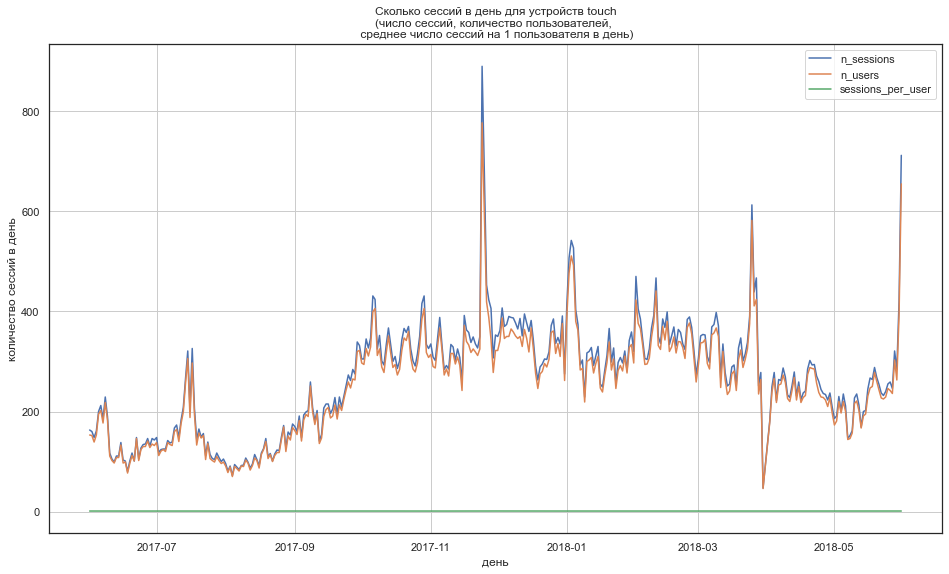

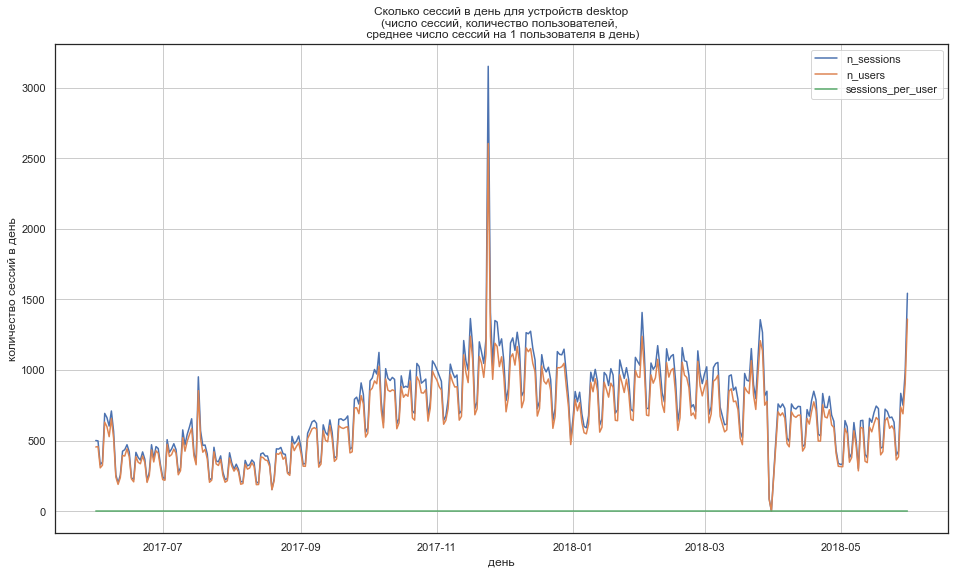

In [299]:
parameters = [
    {
        'df': visits.query('device == "touch"'),
        'title': 'Сколько сессий в день для устройств touch\n(число сессий, количество пользователей, \
\n среднее число сессий на 1 пользователя в день)'
    },
    {
        'df': visits.query('device == "desktop"'),
        'title': 'Сколько сессий в день для устройств desktop\n(число сессий, количество пользователей, \
\n среднее число сессий на 1 пользователя в день)'
    }
]

def sessions_per_user(parameter):
    sessions_per_user = parameter.get('df').groupby('session_date').agg({'uid': ['count','nunique']})
    sessions_per_user.columns = ['n_sessions', 'n_users']
    sessions_per_user['sessions_per_user'] = sessions_per_user['n_sessions'] / sessions_per_user['n_users']
    ax = sessions_per_user.plot(title = parameter.get('title'), grid = True, figsize = (16, 9))
    ax.set_xlabel('день')
    ax.set_ylabel('количество сессий в день')
    plt.show()

for parameter in parameters:
    sessions_per_user(parameter)

На графиках видно, что в летние месяцы число сессий на разных типах устройств низкое, активность начинает повышаться с сентября. Это может быть связано с тем, что летом нет театрального сезона, крупных концертов, а с началом осени мероприятий традиционно становится много. 

Пик количества сессий приходится на конец ноября - начало декабря. Вероятно, пользователи заранее интересуются мероприятиями на новогодние каникулы. 

В день один пользователь в среднем проводит 1 сессию (независимо от типа устройства). 

<div id='id-section11'/>

### [Найдем продолжительность одной сессии (метрика ASL)](#id-section35)

Мы воспользуемся метрикой **ASL**, которая покажет, сколько длится сессия пользователя в среднем.

Сначала посчитаем длину всех сессий, переведем величину в секунды методом `dt.seconds` и посмотрим на распределение методом `hist()`. 

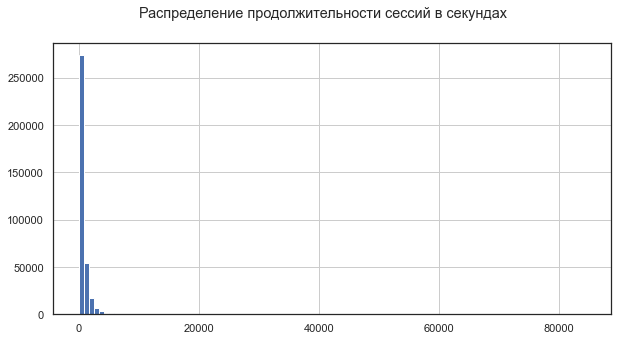

In [300]:
visits['session_duration_sec'] = (visits['end_ts'] - visits['start_ts']).dt.seconds

visits['session_duration_sec'].hist(bins=100, figsize = (10,5))
plt.suptitle('Распределение продолжительности сессий в секундах')
plt.show()

Мы видим, что распределение не нормальное, поэтому для нахождения ASL мы будем рассчитывать не среднее или медиану, а моду методом `mode()`.

In [301]:
display(visits['session_duration_sec'].mode())

0    60
dtype: int64

Продолжительность одной сессии равна 1 минуте, это мало. 

Мы можем посмотреть, как распределена продолжительность сессий на разных устройствах. Возможно, мы увидим существенную разницу в распределении (например, сайт плохо отображается в мобильной версии — и все сессии с устройств `touch` будут короткими, а с `desktop` - длинными). 

Отобразим две гистрограммы на одном графике методом `plot()`. 

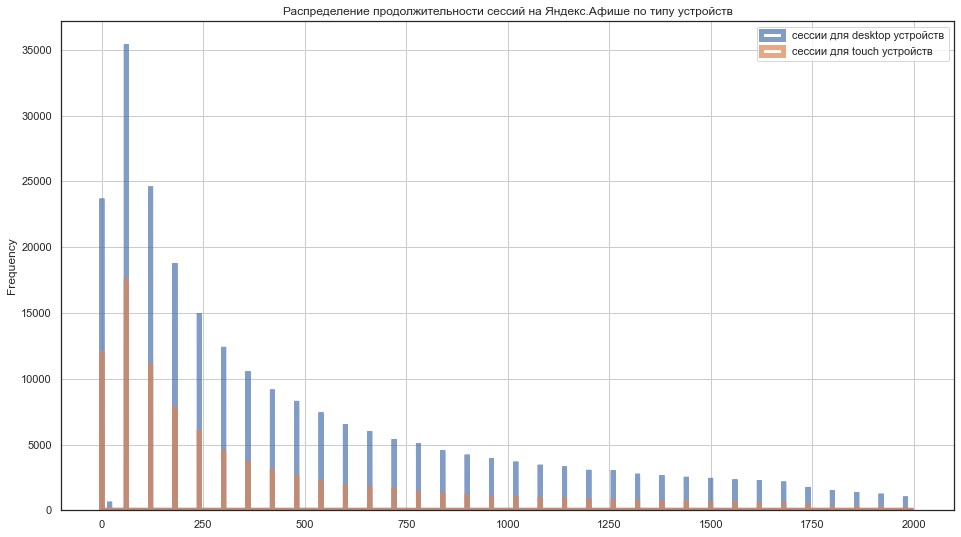

In [302]:
ax = visits.query('device == "desktop"')['session_duration_sec'].plot(kind='hist', histtype='step', linewidth=5, \
                                                                      alpha=0.7, label='сессии для desktop устройств',\
                                                                      bins = 10000, range = (0, 2000), legend=True)
visits.query('device == "touch"')['session_duration_sec'].plot(kind='hist', histtype='step', linewidth=5, \
                                                               alpha=0.7, label='сессии для touch устройств',\
                                                               ax=ax, grid=True, legend=True, title = 'Распределение продолжительности сессий на Яндекс.Афише по типу устройств', \
                                                               bins = 10000, range = (0, 2000), figsize = (16,9)) 
plt.show()

Продолжительность сессий на разных устройствах распределена пропорционально, разницы между устройствами не видно. 

Повторяется график общего распределения для всех сессий, который мы выводили вначале.

<div id='id-section12'/>

### [Вычислим, как часто пользователи возвращаются (метрика Retention Rate)](#id-section36)

Воспользуемся метрикой **Retention Rate** (коэффициент удержания), которая покажет, сколько пользователей из когорты относительно их изначального числа вернулось в последующие периоды.

Определим событие и период — на их основе сформируем когорту. Возьмем дату и время, когда каждый пользователь впервые проявил активность - `first_activity_date` и `first_activity_time`.

В исходной таблице `visits` уже есть столбцы `session_date` и `start_ts`. Чтобы в результирующем датафрейме не было двух столбцов с одинаковыми названиями, изменим имя `Series` на `first_activity_date` и `first_activity_ts`.

In [303]:
first_activity_date = visits.groupby(['uid'])['session_date'].min()
first_activity_date.name = 'first_activity_date'
first_activity_time = visits.groupby(['uid'])['start_ts'].min()
first_activity_time.name = 'first_activity_ts'

Объединим таблицы с исходным датафреймом `visits` методом `join()`.

In [304]:
visits = visits.join(first_activity_date,on='uid') 
visits = visits.join(first_activity_time,on='uid') 

display(visits.head())

,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date,session_duration_sec,first_activity_date,first_activity_ts
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20,1080,2017-12-20,2017-12-20 17:20:00
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19,1680,2018-02-19,2018-02-19 16:53:00
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01,0,2017-07-01,2017-07-01 01:54:00
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20,1440,2018-03-09,2018-03-09 20:05:00
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,12,52,2017-12-27,0,2017-12-27,2017-12-27 14:06:00


Построим когорты c периодом в 1 месяц.

Получим месяц активности и месяц первой активности пользователя методом `astype()` с параметром `datetime64[M]`.

In [305]:
visits['activity_month'] = visits['session_date'].astype('datetime64[M]')
visits['first_activity_month'] = visits['first_activity_date'].astype('datetime64[M]')

Сформируем столбец `cohort_lifetime`, в котором будет храниться разница между двумя датами.

Преобразуем тип `timedelta` в число месяцев, прошедших между датами. Для этого `cohort_lifetime` поделим на константу `np.timedelta64(1, 'M')` из библиотеки `Numpy`.

Округлим значения столбца `cohort_lifetime` методом `round()`, а затем приведём их к целочисленному типу методом `astype('int')`. 

In [306]:
visits['cohort_lifetime'] = visits['activity_month'] - visits['first_activity_month']

visits['cohort_lifetime'] = visits['cohort_lifetime'] / np.timedelta64(1,'M')

visits['cohort_lifetime'] = visits['cohort_lifetime'].round().astype('int')

Сгруппируем данные по когорте и lifetime. Посчитаем для каждой когорты количество активных пользователей на определенный «месяц жизни». 

In [307]:
cohorts = visits.groupby(['first_activity_month','cohort_lifetime']).agg({'uid':'nunique'}).reset_index()
display(cohorts.head())

,first_activity_month,cohort_lifetime,uid
0,2017-06-01,0,13259
1,2017-06-01,1,1043
2,2017-06-01,2,713
3,2017-06-01,3,814
4,2017-06-01,4,909


Чтобы найти Retention Rate, сначала найдем число пользователей, изначально бывших в когорте, и на него разделим число пользователей в каждый следующий месяц.

Найдем исходное количество пользователей в когорте. Возьмем их число на нулевую неделю.

In [308]:
initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_activity_month','uid']]
display(initial_users_count.head())

,first_activity_month,uid
0,2017-06-01,13259
12,2017-07-01,13140
23,2017-08-01,10181
33,2017-09-01,16704
42,2017-10-01,25977


Переименуем столбец `uid` в `cohort_users` методом `rename()`.

In [309]:
initial_users_count = initial_users_count.rename(columns={'uid':'cohort_users'}) 

Объединим данные по когортам с исходным количеством пользователей в когорте методом `merge()`.

In [310]:
cohorts = cohorts.merge(initial_users_count,on='first_activity_month')

Рассчитаем Retention Rate. Разделим количество активных пользователей в каждый из месяцев на исходное число пользователей в когорте.

In [311]:
cohorts['retention'] = cohorts['uid'] / cohorts['cohort_users']

Оставим в обозначении когорты только год и месяц. Применим метод `dt.strftime('%Y-%m')`. 

In [312]:
cohorts['first_activity_month'] = cohorts['first_activity_month'].dt.strftime('%Y-%m')

Построим сводную таблицу и создадим тепловую карту методом `heatmap()` из библиотеки `Seaborn`.

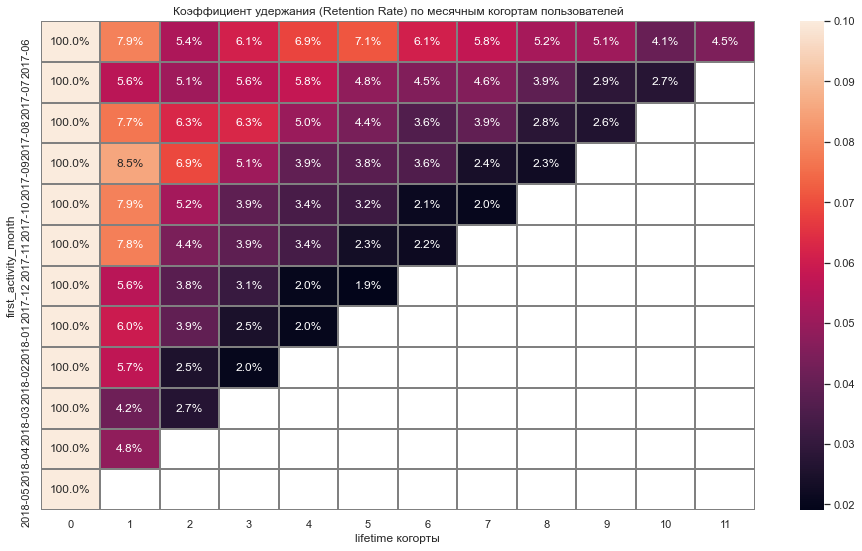

In [313]:
retention_pivot = cohorts.pivot_table(index='first_activity_month',columns='cohort_lifetime',\
                                      values='retention',aggfunc='sum')

sns.set(style='white')
plt.figure(figsize=(16, 9))
plt.title('Коэффициент удержания (Retention Rate) по месячным когортам пользователей')
sns.heatmap(retention_pivot, annot=True, fmt='.1%', vmax = 0.1, linewidths=1, linecolor='gray')\
.set_xlabel('lifetime когорты')
plt.show()

Retention Rate в первую неделю убывает, начиная с когорты декабря 2017. Если для когорты пользователей, пришедших в июне 2017, Retention Rate в первый месяц составляет 7,9%, то для пользователей, пришедших в декабре 2017 — уже 5,6%. Так, за 6 месяцев коэффициент удержания упал на 2,3%, а если сравнивать с когортой апреля 2018, то разница составляет 3%. Это говорит о том, что поведение покупателей меняется. Возможно, были выбраны неэффективные источники трафика или ухудшилось качество работы приложения или сайта.

<div id='id-section13'/>

### [Вывод](#id-section37)

Мы выяснили, что пользователей `desktop` версии больше, чем пользователей `touch`. При этом показатели `sticky factor` практически не отличаются от типа устройства, он за месяц очень низкий - около 4%. Это говорит о том, что пользователи не задерживаются в приложении и на сайте. Необходимо принять меры, чтобы увеличить этот показатель, например, ввести пуш-уведомления или обновить приложение и сайт, предложив новые функции.

На графиках видно, что в летние месяцы число сессий на разных типах устройств низкое, активность начинает повышаться с сентября. Это может быть связано с тем, что летом нет театрального сезона, крупных концертов, а с началом осени мероприятий традиционно становится много. Пик количества сессий приходится на конец ноября - начало декабря. Вероятно, пользователи заранее интересуются мероприятиями на новогодние каникулы.

В день один пользователь в среднем проводит 1 сессию (независимо от типа устройства).

Продолжительность одной сессии равна 1 минуте, что мало. При этом продолжительность сессий на разных устройствах распределена пропорционально, разницы между устройствами не видно. Повторяется график общего распределения для всех сессий.

`Retention Rate` (коэффициент удержания) в первую неделю убывает, начиная с когорты декабря 2017. Если для когорты пользователей, пришедших в июне 2017, Retention Rate в первый месяц составляет 7,9%, то для пользователей, пришедших в декабре 2017 — уже 5,6%. Так, за 6 месяцев коэффициент удержания упал на 2,3%, а если сравнивать с когортой апреля 2018, то разница составляет 3%. Это говорит о том, что поведение покупателей меняется. Возможно, были выбраны неэффективные источники трафика или ухудшилось качество работы приложения или сайта.

<div id='id-section14'/>

## [Шаг 4. Построим отчеты и посчитаем метрики по продажам](#id-section38)

<div id='id-section15'/>

### [Выясним, когда люди начинают покупать и сколько раз покупают за период](#id-section39)

Обратимся к таблице `orders`. Найдем месяц покупки `order_month` методом `astype('datetime64[M]')` и оставим в столбце только год и месяц. 

Для каждого месяца найдем количество совершаемых покупок и сумму, выведем таблицу и нарисованный на ее основе график. 

In [314]:
orders['order_month'] = orders['buy_ts'].astype('datetime64[M]')
orders['order_month'] = orders['order_month'].dt.strftime('%Y-%m')

,purchase_count,purchase_sum
order_month,,
2017-06,2354,9557.49
2017-07,2363,12539.47
2017-08,1807,8758.78
2017-09,3387,18345.51
2017-10,5679,27987.70
2017-11,5659,27069.93
2017-12,6218,36388.60
2018-01,4721,19417.13
2018-02,5281,25560.54


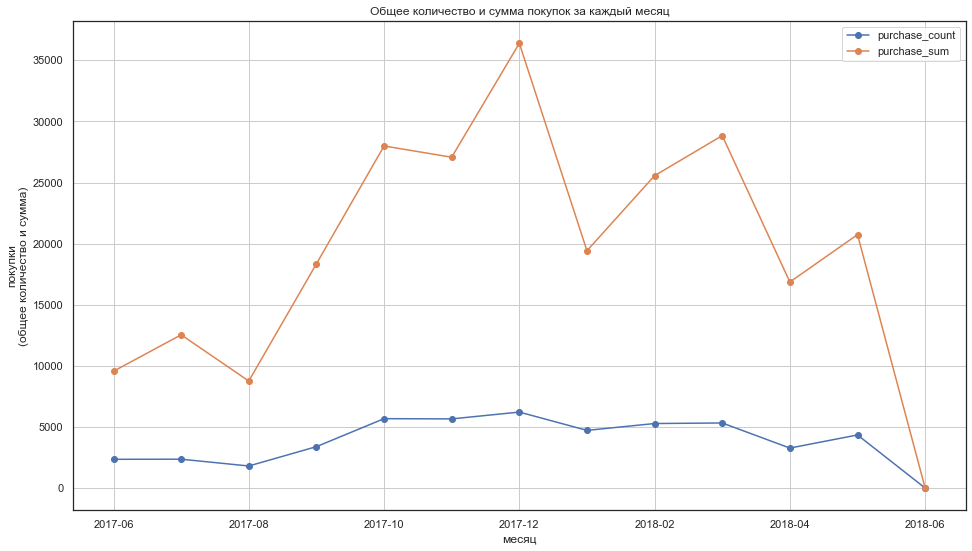

In [315]:
orders_grouped = orders.groupby('order_month').agg({'revenue': ['count', 'sum']})
orders_grouped.columns = ['purchase_count', 'purchase_sum']
display(orders_grouped)

ax = orders_grouped.plot(title = 'Общее количество и сумма покупок за каждый месяц', style = 'o-', grid = True, \
                         figsize = (16, 9))
ax.set_xlabel('месяц')
ax.set_ylabel('покупки\n(общее количество и сумма)')
plt.show()

Количество покупок и сумма потраченных денег начинает увеличиваться с августа (связано с началом нового сезона концертов и спектаклей осенью). 

Пик покупок и затрат достигается в декабре (новогодние мероприятия). В январе наблюдается спад после декабрьского насыщения. 

В феврале и марте есть подъем - возможно, это связано с наличием праздничных дней (билеты на мероприятия преподносятся как подарки женщинам и мужчинам), а также с желанием интересно провести дополнительные выходные. 

Вычислим, сколько проходит времени между первым посещением и покупкой.

В таблице `orders` найдем минимальное время покупки для каждого пользователя, а в `visits` - минимальное время посещения. Объединим это в одну таблицу `orders_visits`.

Посчитаем разницу между временем первого визита и временем первой покупки и переведем в дни.

In [316]:
orders_min = orders.groupby('uid')['buy_ts'].min()
visits_min = visits.groupby('uid')['start_ts'].min()

orders_visits = pd.merge(orders_min, visits_min, on = 'uid')

orders_visits['days'] = orders_visits['buy_ts'] - orders_visits['start_ts']
orders_visits['days'] = orders_visits['days'] / np.timedelta64(1,'D')
orders_visits['days'] = orders_visits['days'].round().astype('int')

display(orders_visits.head())

,buy_ts,start_ts,days
uid,,,
313578113262317,2018-01-03 21:51:00,2017-09-18 22:49:00,107
1575281904278712,2017-06-03 10:13:00,2017-06-03 10:13:00,0
2429014661409475,2017-10-11 18:33:00,2017-10-11 17:14:00,0
2464366381792757,2018-01-28 15:54:00,2018-01-27 20:10:00,1
2551852515556206,2017-11-24 10:14:00,2017-11-24 10:14:00,0


Посмотрим на распределение количества дней между первым визитом и первой покупкой.

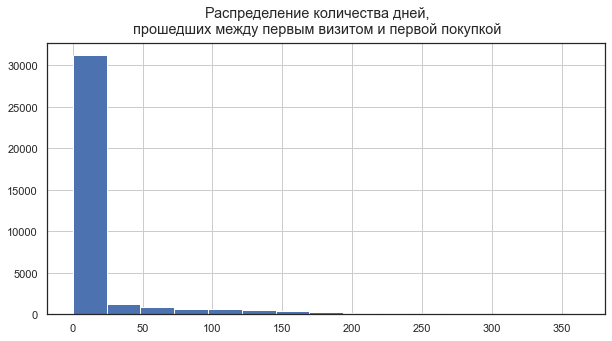

In [317]:
orders_visits['days'].hist(bins = 15, figsize = (10, 5))
plt.suptitle('Распределение количества дней,\nпрошедших между первым визитом и первой покупкой')
plt.show()

Найдем модальное значение (так как распределение не нормальное). 

In [318]:
orders_visits['days'].describe()

count    36523.000000
mean        16.893656
std         47.075936
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max        363.000000
Name: days, dtype: float64

In [319]:
display(orders_visits['days'].mode())

0    0
dtype: int64

В среднем, покупка происходит сразу после первого посещения.  

<div id='id-section16'/>

### [Определим величину среднего чека](#id-section40)

Вычислим, как с течением времени изменяется средний чек — сумма покупок, деленная на число покупателей.

Для каждого покупателя найдем дату его первой покупки методами `groupby()` и `min()`, назовем результирующий столбец `first_order_date`. Затем к основной таблице `orders` присоединим группировку методом `join()`. 

Вычленим из `first_order_date` месяц (`first_order_month`) методом `astype('datetime64[M]')` и для удобства оставим в строке только год и месяц методом `dt.strftime('%Y-%m')`.


Сгруппируем данные по когорте `first_order_month` и месяцу совершения заказа `order_month` и найдем сумму покупок и число покупателей за период.

In [320]:
display(orders.head())

,buy_ts,revenue,uid,order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06


In [321]:
first_order_date_by_customers = orders.groupby('uid')['buy_ts'].min()
first_order_date_by_customers.name = 'first_order_date'
orders = orders.join(first_order_date_by_customers,on = 'uid')
orders['first_order_month'] = orders['first_order_date'].astype('datetime64[M]')
orders['first_order_month'] = orders['first_order_month'].dt.strftime('%Y-%m')


orders_grouped_by_cohorts = orders.groupby(['first_order_month','order_month']).agg({'revenue':'sum',\
                                                                                     'uid':'nunique'})
display(orders_grouped_by_cohorts.head()) 

revenue   uid
first_order_month order_month               
2017-06           2017-06      9557.49  2023
                  2017-07       981.82    61
                  2017-08       885.34    50
                  2017-09      1931.30    54
                  2017-10      2068.58    88

Найдем средний чек покупателя `revenue_per_user` — разделим показатель `revenue` на `uid`.


In [322]:
orders_grouped_by_cohorts['revenue_per_user'] = orders_grouped_by_cohorts['revenue'] / orders_grouped_by_cohorts\
['uid']

Построим сводную таблицу изменения среднего чека в когортах по месяцу совершения покупки и оценим, как изменяется средний чек с течением времени. Выведем тепловую карту.

order_month,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06
first_order_month,,,,,,,,,,,,,
2017-06,4.724414,16.095410,17.706800,35.764815,23.506591,22.207761,31.011935,25.033191,19.295690,27.233556,25.681333,9.804151,NaN
2017-07,NaN,6.010218,12.396346,21.035965,10.786094,6.938163,7.896842,6.421111,6.992821,7.382143,12.861818,11.513846,NaN
2017-08,NaN,NaN,5.276518,11.148793,11.851321,12.182955,16.921250,12.139063,9.620333,12.610455,21.070000,8.307419,NaN
2017-09,NaN,NaN,NaN,5.644529,22.188385,13.445200,138.669189,19.881538,26.095000,27.437121,16.961351,11.044651,NaN
2017-10,NaN,NaN,NaN,NaN,5.003733,11.287427,6.753252,7.413152,7.072796,7.255139,6.573214,7.479701,NaN
2017-11,NaN,NaN,NaN,NaN,NaN,5.154683,7.339054,6.786583,12.510660,7.457284,4.580833,7.564839,NaN
2017-12,NaN,NaN,NaN,NaN,NaN,NaN,4.738191,7.816575,39.366019,48.135052,27.431400,23.518413,NaN
2018-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.135636,8.721228,12.365542,11.199767,4.699556,NaN
2018-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.156987,8.610000,4.942414,6.941026,NaN


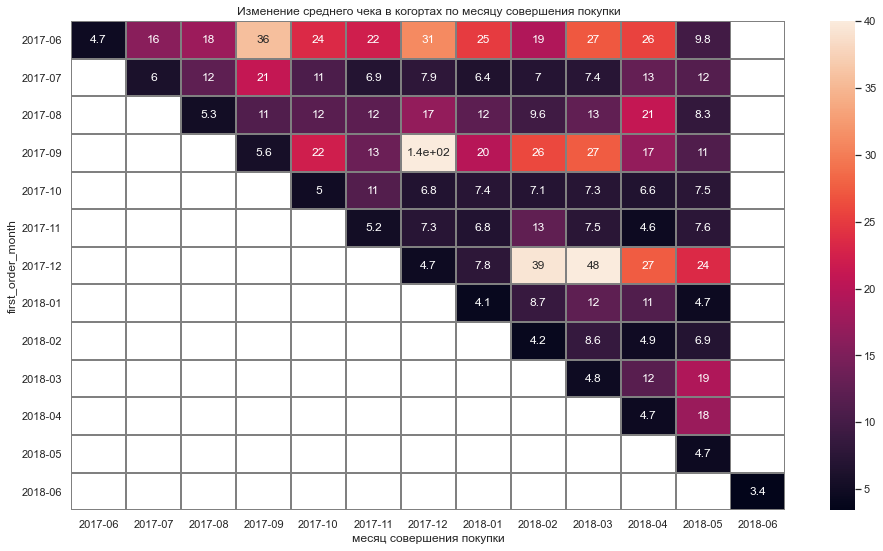

In [323]:
ax = orders_grouped_by_cohorts.pivot_table(index='first_order_month',columns='order_month',\
                                           values='revenue_per_user',aggfunc='mean')
display(ax)

sns.set(style='white')
plt.figure(figsize=(16, 9))
plt.title('Изменение среднего чека в когортах по месяцу совершения покупки')
sns.heatmap(ax, annot=True, vmax = 40, linewidths=1, linecolor='gray')\
.set_xlabel('месяц совершения покупки')
plt.show()

Во всех когортах средний чек пользователей возрастает на следующий месяц после месяца первой покупки. А в некоторых когортах средний чек стремительно растет с течением времени. Например, в когортах июня 2017, сентября 2017, декабря 2017, марта 2018.

Самая высокая величина среднего чека видна в когорте сентября 2017 за декабрь 2017. Возможно, этим пользователям были предложены какие-то выгодные условия для приобретения билетов.

Найдем величину общего среднего чека:

In [324]:
avg_check = orders['revenue'].mean()

display('Общий средний чек равен: {:.2}'.format(avg_check))

'Общий средний чек равен: 5.0'

<div id='id-section17'/>

### [Посчитаем, сколько денег приносят пользователи (метрика LTV)](#id-section41)

In [325]:
display(orders.head())

,buy_ts,revenue,uid,order_month,first_order_date,first_order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06,2017-06-01 00:10:00,2017-06
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06,2017-06-01 00:25:00,2017-06
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06,2017-06-01 00:27:00,2017-06
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06,2017-06-01 00:29:00,2017-06
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06,2017-06-01 07:58:00,2017-06


Посчитаем количество новых покупателей (`n_buyers`) за каждый месяц из `first_order_month`.

In [326]:
cohort_sizes = orders.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()

cohort_sizes.columns = ['first_order_month', 'n_buyers']
display(cohort_sizes.head())

,first_order_month,n_buyers
0,2017-06,2023
1,2017-07,1923
2,2017-08,1370
3,2017-09,2581
4,2017-10,4340


Сгруппируем таблицу `orders` в когорты по месяцу первой покупки и месяцу каждого заказа и сложим выручку. Сбросим индекс методом `reset_index()`.

In [327]:
cohorts = orders.groupby(['first_order_month','order_month']).agg({'revenue': 'sum'}).reset_index()
display(cohorts.head())

,first_order_month,order_month,revenue
0,2017-06,2017-06,9557.49
1,2017-06,2017-07,981.82
2,2017-06,2017-08,885.34
3,2017-06,2017-09,1931.30
4,2017-06,2017-10,2068.58


Строка таблицы `cohorts` показывает, какую выручку принесла когорта. Покупатели, сделавшие свой первый заказ в июне 2017, в этом же месяце принесли суммарно 9557.49 выручки, а в следующем месяце - лишь 981.82 выручки. 

Добавим в таблицу `cohorts` с выручкой таблицу `cohort_sizes` с данными о том, сколько людей первый раз совершили покупку в каждый месяц. Объединим обе таблицы в отдельный отчет. 

In [328]:
report = pd.merge(cohort_sizes, cohorts, on = 'first_order_month')
display(report.head())

,first_order_month,n_buyers,order_month,revenue
0,2017-06,2023,2017-06,9557.49
1,2017-06,2023,2017-07,981.82
2,2017-06,2023,2017-08,885.34
3,2017-06,2023,2017-09,1931.30
4,2017-06,2023,2017-10,2068.58


В связи с тем, что LTV считают не из выручки, а из валовой прибыли, найдем валовую прибыль `gp`, умножив выручку `revenue` на маржинальность (будем считать ее равной 100%). 

Кроме того, LTV — относительный показатель. Значит, его удобнее смотреть по «возрастным» когортам, где в столбцах — не месяц заказа, а возраст (`age`) когорты. Возраст - это разница между месяцем заказа и месяцем первого заказа, деленная на величину `timedelta`.

In [329]:
margin_rate = 1
    
report['gp'] = report['revenue'] * margin_rate

report['age'] = (pd.to_datetime(report['order_month']) - pd.to_datetime(report['first_order_month'])) / np.timedelta64(1, 'M')

report['age'] = report['age'].round().astype('int')
display(report.head())

,first_order_month,n_buyers,order_month,revenue,gp,age
0,2017-06,2023,2017-06,9557.49,9557.49,0
1,2017-06,2023,2017-07,981.82,981.82,1
2,2017-06,2023,2017-08,885.34,885.34,2
3,2017-06,2023,2017-09,1931.30,1931.30,3
4,2017-06,2023,2017-10,2068.58,2068.58,4


Наконец, найдем LTV. Разделим валовую прибыль когорт за каждый месяц на общее число пользователей в каждой когорте. Для наглядности визуализируем когорты в виде сводной таблицы.

In [330]:
report['ltv'] = report['gp'] / report['n_buyers']
    
output = report.pivot_table(
        index='first_order_month', 
        columns='age', 
        values='ltv', 
        aggfunc='mean')
display(output)

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06,4.724414,0.485329,0.437637,0.954671,1.022531,0.735502,0.950440,0.581592,0.553213,0.605788,0.571261,0.256856
2017-07,6.010218,0.335211,0.623531,0.358976,0.176791,0.156048,0.120208,0.141820,0.161232,0.147145,0.155673,NaN
2017-08,5.276518,0.471993,0.458482,0.391277,0.494051,0.283540,0.210664,0.405007,0.292212,0.187978,NaN,NaN
2017-09,5.644529,1.117586,0.520930,3.975792,0.400558,0.647067,0.701608,0.243150,0.184006,NaN,NaN,NaN
2017-10,5.003733,0.535763,0.191394,0.157145,0.151560,0.120362,0.084816,0.115470,NaN,NaN,NaN,NaN
2017-11,5.154683,0.399233,0.199556,0.324952,0.148013,0.053879,0.114928,NaN,NaN,NaN,NaN,NaN
2017-12,4.738191,0.260374,0.925097,1.065275,0.312930,0.338047,NaN,NaN,NaN,NaN,NaN,NaN
2018-01,4.135636,0.294758,0.304281,0.142778,0.062698,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02,4.156987,0.278274,0.078515,0.074144,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Посчитаем накопительный LTV каждой когорты. Сложим их LTV за все месяцы методом `cumsum(axis=1)`.

Для наглядности построим тепловую карту таблицы.

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06,4.724414,5.209743,5.647380,6.602051,7.624582,8.360084,9.310524,9.892116,10.445329,11.051117,11.622378,11.879234
2017-07,6.010218,6.345429,6.968960,7.327936,7.504727,7.660775,7.780983,7.922803,8.084035,8.231180,8.386854,NaN
2017-08,5.276518,5.748511,6.206993,6.598270,7.092321,7.375861,7.586526,7.991533,8.283745,8.471723,NaN,NaN
2017-09,5.644529,6.762115,7.283045,11.258838,11.659396,12.306463,13.008071,13.251220,13.435227,NaN,NaN,NaN
2017-10,5.003733,5.539495,5.730889,5.888035,6.039594,6.159956,6.244772,6.360242,NaN,NaN,NaN,NaN
2017-11,5.154683,5.553916,5.753472,6.078424,6.226437,6.280316,6.395244,NaN,NaN,NaN,NaN,NaN
2017-12,4.738191,4.998565,5.923662,6.988937,7.301866,7.639913,NaN,NaN,NaN,NaN,NaN,NaN
2018-01,4.135636,4.430394,4.734675,4.877453,4.940151,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02,4.156987,4.435262,4.513777,4.587921,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


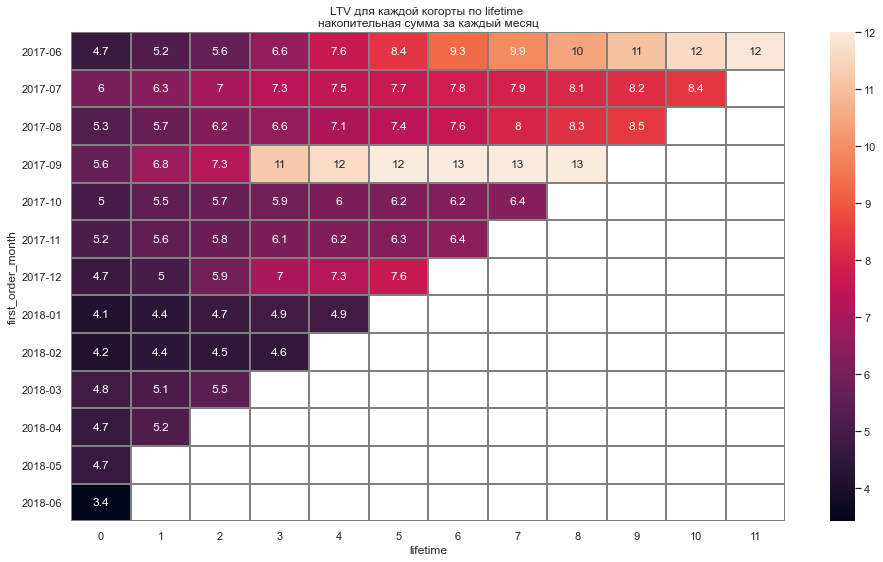

In [331]:
output_cumsum = output.cumsum(axis=1)
display(output_cumsum)

sns.set(style='white')
plt.figure(figsize=(16, 9))
plt.title('LTV для каждой когорты по lifetime \nнакопительная сумма за каждый месяц')
sns.heatmap(output_cumsum, annot=True, vmax = 12, linewidths=1, linecolor='gray')\
.set_xlabel('lifetime')
plt.show()

В среднем каждый покупатель из когорты июня 2017 принес по 11.87 (~12) выручки за 12 месяцев «жизни» когорты - этот результат мог бы быть самым высоким, так как эта когорта самая старая, но ее обогнала когорта сентября 2017 за счет того, что средний чек у покупателей из этой когорты на 3 месяц (декабрь) оказался высоким, а на 6 месяц (июнь) - самым высоким. Остальные когорты не показали таких выдающихся результатов. 

<div id='id-section18'/>

### [Вывод](#id-section42)

Количество покупок и сумма потраченных пользователями денег начинает увеличиваться с августа (связано с началом нового сезона концертов и спектаклей осенью). Пик покупок и затрат достигается в декабре (новогодние мероприятия). В феврале и марте также есть подъем - возможно, это связано с наличием праздничных дней (билеты на мероприятия преподносятся как подарки женщинам и мужчинам), а также с желанием интересно провести дополнительные выходные.

В среднем, после первого посещения сразу происходит покупка.

Во всех когортах за месяц средний чек пользователей возрастает на следующий месяц после месяца первой покупки. А в некоторых когортах средний чек стремительно растет с течением времени. Например, в когортах июня 2017, сентября 2017, декабря 2017, марта 2018.

Самая высокая величина среднего чека видна в когорте сентября 2017 за декабрь 2017. Возможно, этим пользователям были предложены какие-то выгодные условия для приобретения билетов.

В среднем каждый покупатель из когорты июня 2017 принес по 11.87 (~12) выручки за 12 месяцев «жизни» когорты - этот результат мог бы быть самым высоким, так как эта когорта самая старая, но ее обогнала когорта сентября 2017 за счет того, что средний чек у покупателей из этой когорты на 3 месяц (декабрь) оказался высоким, а на 6 месяц (июнь) - самым высоким. Остальные когорты не показали таких выдающихся результатов.

<div id='id-section19'/>

## [Шаг 5. Построим отчеты и посчитаем метрики по маркетингу](#id-section43)

<div id='id-section20'/>

### [Вычислим, сколько денег потратили маркетологи: всего / на каждый рекламный источник / по времени](#id-section44)

In [332]:
display(costs.head())

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


Сложим все затраты методом `sum()` и узнаем, сколько денег потратили маркетологи на все рекламные источники за все время.

In [333]:
display(costs['costs'].sum())

329131.62

Найдем затраты на маркетинг по каждому рекламному источнику методом `groupby()`. Отсортируем значения и выведем график. 

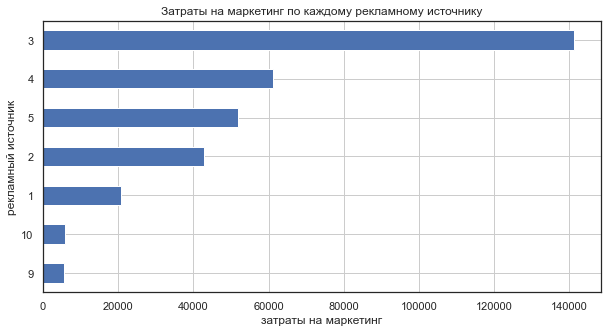

In [334]:
ax = costs.groupby('source_id')['costs'].sum().sort_values().plot(kind = 'barh', \
                    title = 'Затраты на маркетинг по каждому рекламному источнику', grid = True, figsize = (10, 5))

ax.set_xlabel('затраты на маркетинг')
ax.set_ylabel('рекламный источник')
plt.show()

Больше всего денег было затрачено на рекламные источники: 3, 4, 5.
Меньше всего - на рекламные источники: 9, 10.

Узнаем, сколько денег было затрачено на маркетинг в течение времени. За временной промежуток мы решили взять месяц. Выделим из столбца `dt` месяц методом `astype('datetime64[M]')` и оставим для отображения только год и месяц.

Построим график, который покажет, как за каждый месяц менялись затраты на каждый рекламный источник.

In [335]:
costs['costs_month'] = costs['dt'].astype('datetime64[M]')
costs['costs_month'] = costs['costs_month'].dt.strftime('%Y-%m')

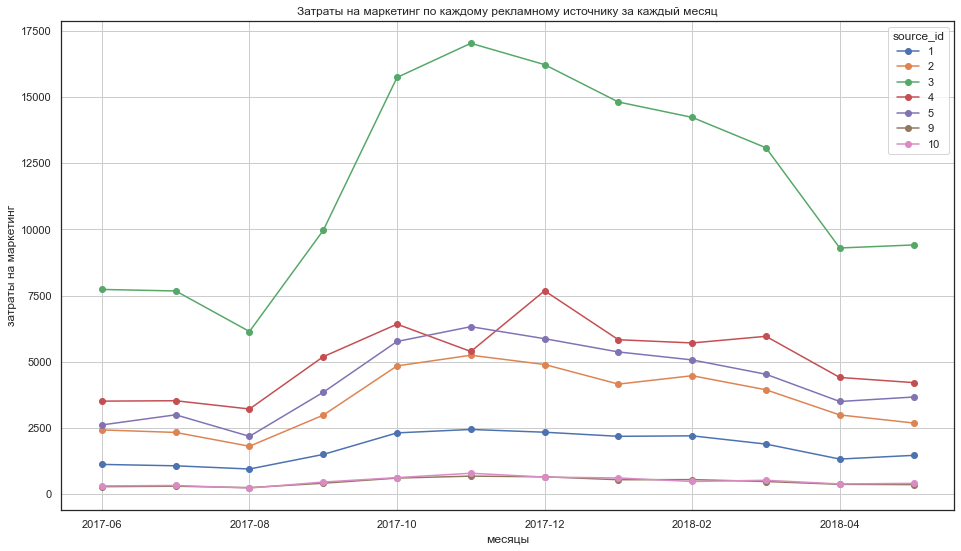

In [336]:
ax = costs.pivot_table(index = 'costs_month', columns = 'source_id', values = 'costs', aggfunc = 'sum')\
.plot(title = 'Затраты на маркетинг по каждому рекламному источнику за каждый месяц', style='o-', grid = True, \
figsize = (16, 9))

ax.set_xlabel('месяцы')
ax.set_ylabel('затраты на маркетинг')
plt.show()

Затраты на почти все рекламные источники достигали пика в ноябре 2017 (видимо, для того, чтобы привлечь пользователей для новогодних покупок). На источник 4 затраты достигли пика в декабре. 

В последующие периоды затраты на маркетинг снижаются. 

<div id='id-section21'/>

### [Найдем стоимость привлечения одного покупателя из каждого источника (метрика CAC)](#id-section45)

Сформируем таблицу `orders_first`, в которой останутся данные по первым заказам пользователей. Для каждого пользователя посчитаем сумму его заказов в таблице `orders_by_user`.

Объединим 2 таблицы по пользователям.

In [337]:
display(orders.head())

,buy_ts,revenue,uid,order_month,first_order_date,first_order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06,2017-06-01 00:10:00,2017-06
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06,2017-06-01 00:25:00,2017-06
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06,2017-06-01 00:27:00,2017-06
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06,2017-06-01 00:29:00,2017-06
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06,2017-06-01 07:58:00,2017-06


In [338]:
orders_first = orders[orders['buy_ts'] == orders['first_order_date']]

orders_first = orders_first.rename(columns={'first_order_date':'first_order_ts'}) 

orders_first['first_order_date'] = orders_first['first_order_ts'].dt.strftime('%Y-%m-%d')

orders_by_user = orders[['uid', 'revenue']].groupby('uid')['revenue'].sum().reset_index()

users_first = orders_first[['uid', 'buy_ts','order_month', 'first_order_date']].merge(orders_by_user, on = 'uid')

display(users_first.head())

,uid,buy_ts,order_month,first_order_date,revenue
0,10329302124590727494,2017-06-01 00:10:00,2017-06,2017-06-01,17.00
1,11627257723692907447,2017-06-01 00:25:00,2017-06,2017-06-01,0.55
2,17903680561304213844,2017-06-01 00:27:00,2017-06,2017-06-01,0.37
3,16109239769442553005,2017-06-01 00:29:00,2017-06,2017-06-01,0.55
4,14200605875248379450,2017-06-01 07:58:00,2017-06,2017-06-01,0.37


В таблицу `visits_first` запишем данные по первым посещениям пользователей. Оставим столбцы с идентификатором пользователя и источником, из которого он пришел в первый раз.

In [339]:
display(visits.head())

,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date,session_duration_sec,first_activity_date,first_activity_ts,activity_month,first_activity_month,cohort_lifetime
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20,1080,2017-12-20,2017-12-20 17:20:00,2017-12-01,2017-12-01,0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19,1680,2018-02-19,2018-02-19 16:53:00,2018-02-01,2018-02-01,0
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01,0,2017-07-01,2017-07-01 01:54:00,2017-07-01,2017-07-01,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20,1440,2018-03-09,2018-03-09 20:05:00,2018-05-01,2018-03-01,2
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,12,52,2017-12-27,0,2017-12-27,2017-12-27 14:06:00,2017-12-01,2017-12-01,0


In [340]:
visits_first = visits[visits['start_ts'] == visits['first_activity_ts']]

visits_first = visits_first[['uid', 'source_id']]
display(visits_first.head())

,uid,source_id
0,16879256277535980062,4
1,104060357244891740,2
2,7459035603376831527,5
4,9969694820036681168,3
5,16007536194108375387,5


К таблице `users_first` с датой и суммой первого заказа присоединим таблицу `visits_first` с источниками, из которых пришли пользователи, чтобы сделать первый заказ.

In [341]:
users_first = users_first.merge(visits_first, on = 'uid')
display(users_first.head())

,uid,buy_ts,order_month,first_order_date,revenue,source_id
0,10329302124590727494,2017-06-01 00:10:00,2017-06,2017-06-01,17.00,1
1,11627257723692907447,2017-06-01 00:25:00,2017-06,2017-06-01,0.55,2
2,17903680561304213844,2017-06-01 00:27:00,2017-06,2017-06-01,0.37,2
3,16109239769442553005,2017-06-01 00:29:00,2017-06,2017-06-01,0.55,2
4,14200605875248379450,2017-06-01 07:58:00,2017-06,2017-06-01,0.37,3


По каждому источнику и дате посчитаем количество покупателей и сумму их покупок.

In [342]:
sources = users_first.groupby(['source_id', 'first_order_date'], as_index = False).agg({'uid':'count', 'revenue':'sum'})

sources = sources.rename(columns={'first_order_date':'date'}) 
display(sources.head())

,source_id,date,uid,revenue
0,1,2017-06-01,14,1769.67
1,1,2017-06-02,7,212.94
2,1,2017-06-03,7,1143.25
3,1,2017-06-04,3,7.54
4,1,2017-06-05,18,1987.83


Посчитаем суммарные затраты на маркетинг для каждого рекламного источника и даты (группировка по таблице `costs`).

In [343]:
display(costs.head())

,source_id,dt,costs,costs_month
0,1,2017-06-01,75.20,2017-06
1,1,2017-06-02,62.25,2017-06
2,1,2017-06-03,36.53,2017-06
3,1,2017-06-04,55.00,2017-06
4,1,2017-06-05,57.08,2017-06


In [344]:
costs_by_source = costs.groupby(['source_id', 'dt'])['costs'].sum().reset_index()
costs_by_source['date'] = costs_by_source['dt'].dt.strftime('%Y-%m-%d')

Объединим таблицу `sources` (количество покупателей и сумма их покупок по каждому источнику и дате) с таблицей `costs_by_source` (суммарные затраты на маркетинг для каждого рекламного источника и даты) по двум общим столбцам. 

In [345]:
table = sources.merge(costs_by_source, on = ['date', 'source_id'])
display(table.head())

,source_id,date,uid,revenue,dt,costs
0,1,2017-06-01,14,1769.67,2017-06-01,75.20
1,1,2017-06-02,7,212.94,2017-06-02,62.25
2,1,2017-06-03,7,1143.25,2017-06-03,36.53
3,1,2017-06-04,3,7.54,2017-06-04,55.00
4,1,2017-06-05,18,1987.83,2017-06-05,57.08


Чтобы сделать график не только по дате, но и по месяцу, выделим столбец с месяцем.

In [346]:
table['month'] = pd.to_datetime(table['date']).dt.strftime('%Y-%m')
display(table.head())

,source_id,date,uid,revenue,dt,costs,month
0,1,2017-06-01,14,1769.67,2017-06-01,75.20,2017-06
1,1,2017-06-02,7,212.94,2017-06-02,62.25,2017-06
2,1,2017-06-03,7,1143.25,2017-06-03,36.53,2017-06
3,1,2017-06-04,3,7.54,2017-06-04,55.00,2017-06
4,1,2017-06-05,18,1987.83,2017-06-05,57.08,2017-06


In [347]:
table_by_month = table.groupby(['source_id', 'month']).agg({'costs': 'sum', 'revenue': 'sum', 'uid': 'sum'}).reset_index()

display(table_by_month.head())

,source_id,month,costs,revenue,uid
0,1,2017-06,1103.93,6392.39,190
1,1,2017-07,1072.88,3342.52,160
2,1,2017-08,925.63,2110.91,113
3,1,2017-09,1502.01,2364.55,227
4,1,2017-10,2315.75,2850.08,340


Посчитаем метрику CAC по датам - разделим затраты на количество покупателей по каждому рекламному ресурсу и дате. 

In [348]:
table['cac'] = table['costs'] / table['uid']
display(table.head())

,source_id,date,uid,revenue,dt,costs,month,cac
0,1,2017-06-01,14,1769.67,2017-06-01,75.20,2017-06,5.371429
1,1,2017-06-02,7,212.94,2017-06-02,62.25,2017-06,8.892857
2,1,2017-06-03,7,1143.25,2017-06-03,36.53,2017-06,5.218571
3,1,2017-06-04,3,7.54,2017-06-04,55.00,2017-06,18.333333
4,1,2017-06-05,18,1987.83,2017-06-05,57.08,2017-06,3.171111


Посчитаем метрику CAC по месяцу - разделим затраты на количество покупателей по каждому рекламному ресурсу и месяцу.

In [349]:
table_by_month['cac'] = table_by_month['costs'] / table_by_month['uid']
display(table_by_month.head())

,source_id,month,costs,revenue,uid,cac
0,1,2017-06,1103.93,6392.39,190,5.810158
1,1,2017-07,1072.88,3342.52,160,6.705500
2,1,2017-08,925.63,2110.91,113,8.191416
3,1,2017-09,1502.01,2364.55,227,6.616784
4,1,2017-10,2315.75,2850.08,340,6.811029


Выведем результаты на графики и посмотрим, какова средняя стоимость привлечения одного покупателя из каждого источника. Также построим графики изменения САС по месяцам и по дням в разрезе источников.

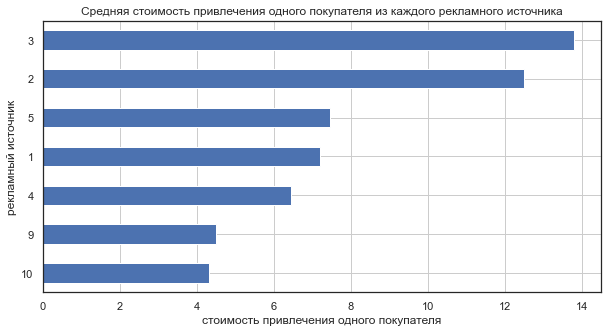

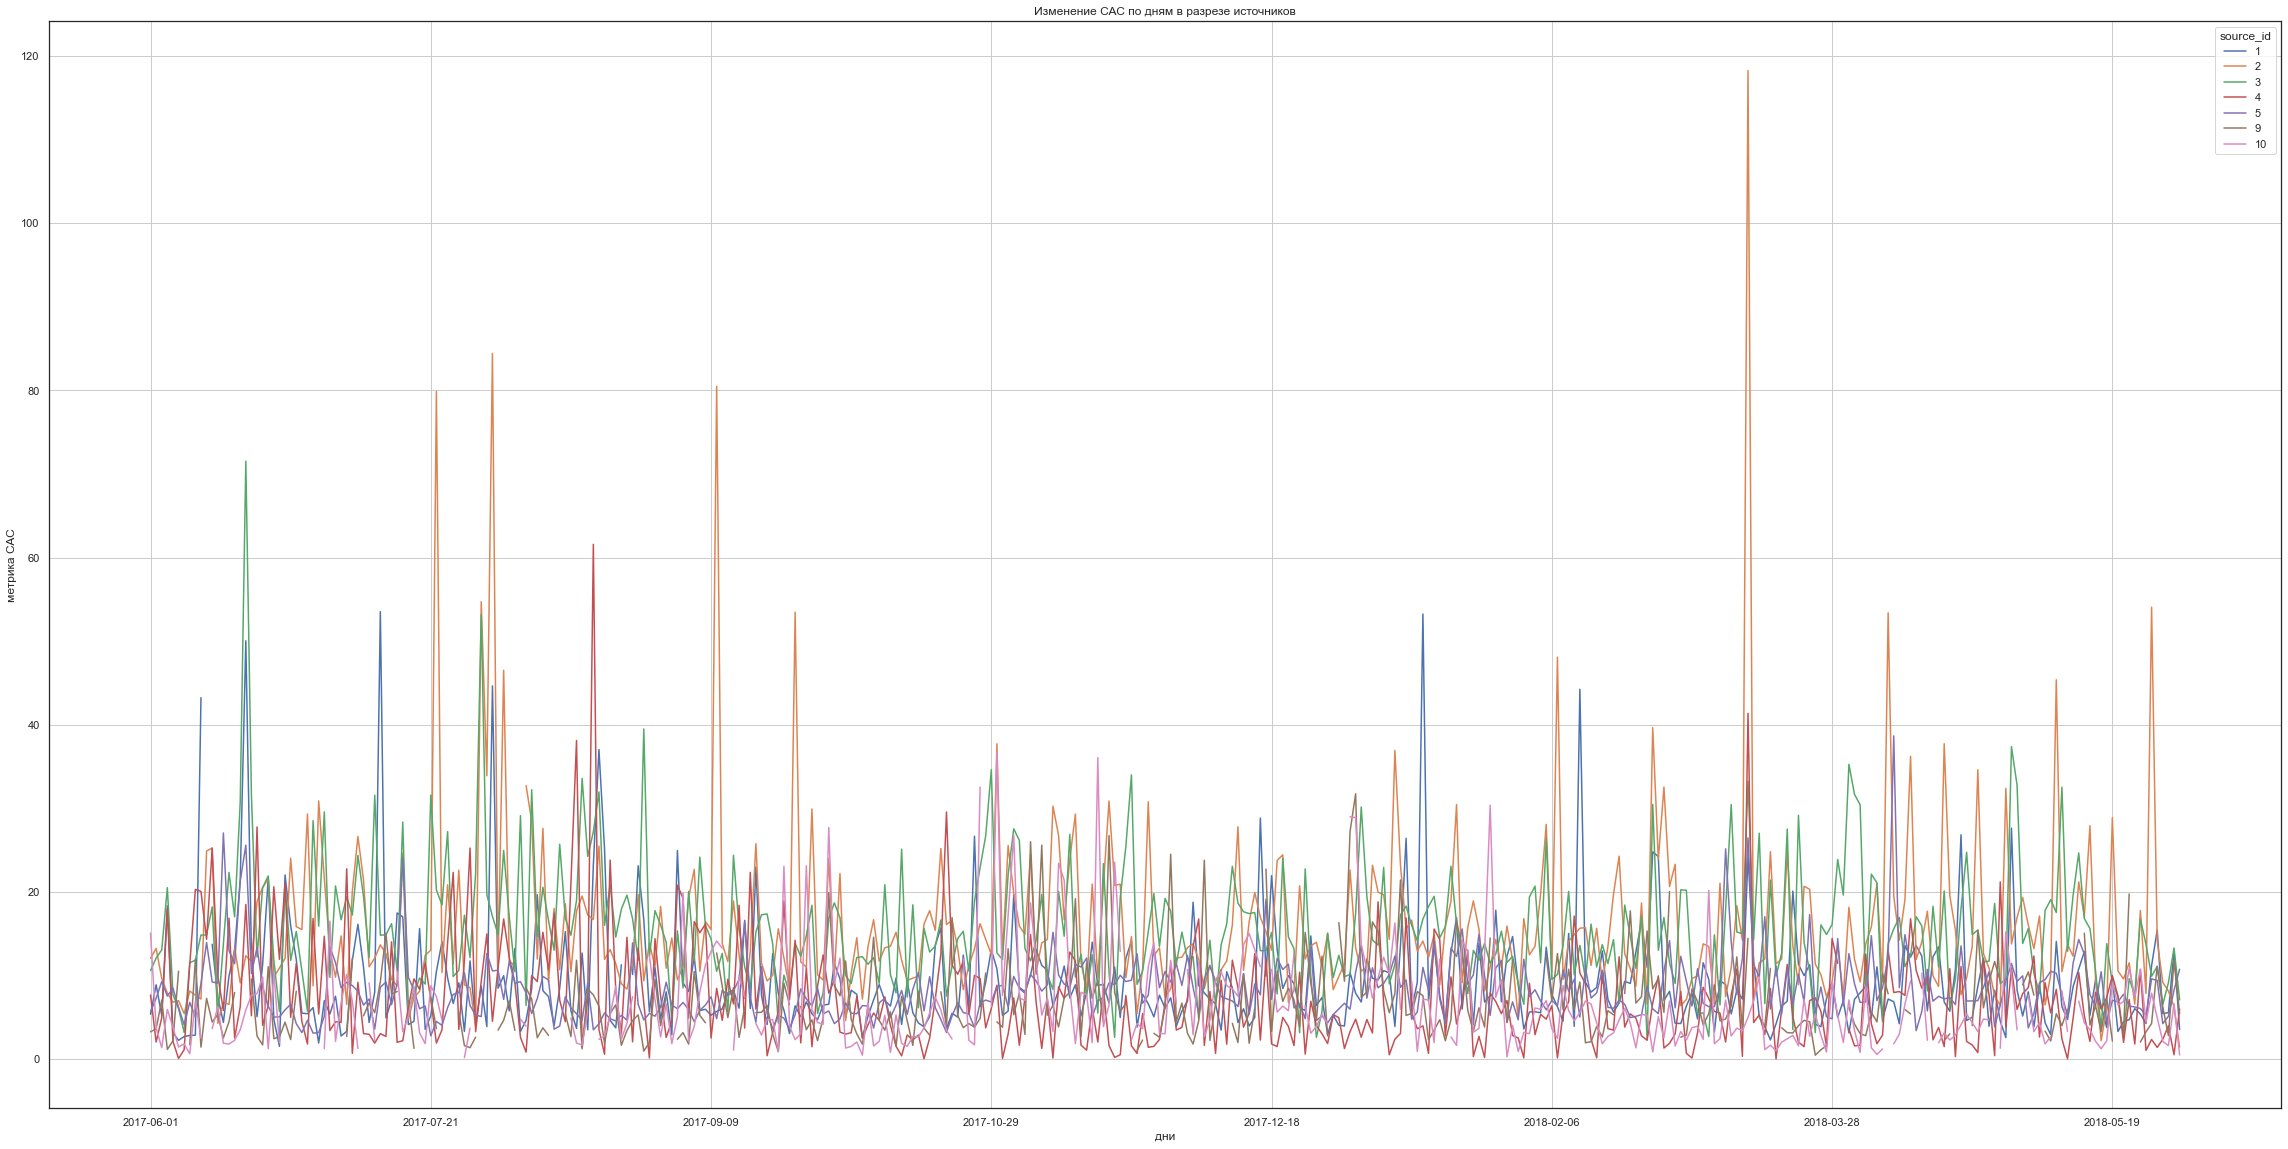

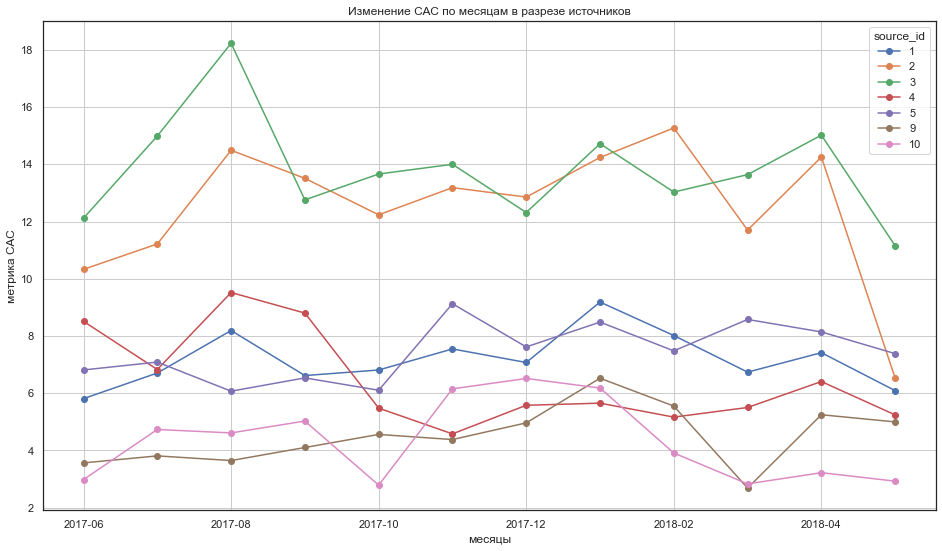

In [350]:
ax = table_by_month.groupby('source_id')['cac'].mean().sort_values().plot(kind = 'barh', \
                title = 'Средняя стоимость привлечения одного покупателя из каждого рекламного источника', \
                                                                 grid = True, figsize = (10, 5))
ax.set_xlabel('стоимость привлечения одного покупателя')
ax.set_ylabel('рекламный источник')
plt.show()

ax = table.pivot_table(index = 'date', columns = 'source_id', values = 'cac')\
.plot(title = 'Изменение САС по дням в разрезе источников', grid = True, figsize = (40, 20))
ax.set_xlabel('дни')
ax.set_ylabel('метрика САС')
plt.show()

ax = table_by_month.pivot_table(index = 'month', columns = 'source_id', values = 'cac')\
.plot(title = 'Изменение САС по месяцам в разрезе источников', grid = True, style = '-o', figsize = (16, 9))
ax.set_xlabel('месяцы')
ax.set_ylabel('метрика САС')
plt.show()

Самыми дорогими по стоимости привлечения одного покупателя оказались рекламные источники: 3, 2, 5. Причем на источник 3 изначально было затрачено больше всего денег.

Меньше всего по стоимости привлечение покупателей обходится из источников: 10, 9, 4. При этом источник 4 входит в число тех, на которые было затрачено больше всего денег, а на источники 9, 10 - меньше всего денег.

<div id='id-section22'/>

### [Посчитаем, на сколько окупились расходы на рекламные источники (метрика ROMI)](#id-section46)



Для каждого покупателя из таблицы `orders` найдем дату и время его первой покупки, после этого присоединим к результату таблицу `visits_first`, в которой содержатся данные о том, из каких источников пришли пользователи в первый раз.

In [351]:
payers = orders.groupby('uid').agg({'buy_ts': 'min'}).merge(visits_first, on = 'uid').reset_index()
payers = payers.rename(columns = {'buy_ts': 'first_buy'})
display(payers.head())

,index,uid,first_buy,source_id
0,0,313578113262317,2018-01-03 21:51:00,2
1,1,1575281904278712,2017-06-03 10:13:00,10
2,2,2429014661409475,2017-10-11 18:33:00,3
3,3,2464366381792757,2018-01-28 15:54:00,5
4,4,2551852515556206,2017-11-24 10:14:00,5


Сформируем таблицу для расчета LTV. К таблице `payers` присоединим таблицу `orders` со всей информацией о заказах. 

In [352]:
ltv = payers.merge(orders, on = 'uid')

Посчитаем разницу между временем, когда был сделан заказ и временем, когда был сделан первый заказ, получим новый столбец `lifetime`.

In [353]:
ltv['lifetime'] = ((ltv['buy_ts'] - ltv['first_buy']) / np.timedelta64(1,'M')).round().astype(int)
display(ltv.head())

,index,uid,first_buy,source_id,buy_ts,revenue,order_month,first_order_date,first_order_month,lifetime
0,0,313578113262317,2018-01-03 21:51:00,2,2018-01-03 21:51:00,0.55,2018-01,2018-01-03 21:51:00,2018-01,0
1,1,1575281904278712,2017-06-03 10:13:00,10,2017-06-03 10:13:00,1.22,2017-06,2017-06-03 10:13:00,2017-06,0
2,1,1575281904278712,2017-06-03 10:13:00,10,2017-06-03 17:39:00,1.83,2017-06,2017-06-03 10:13:00,2017-06,0
3,2,2429014661409475,2017-10-11 18:33:00,3,2017-10-11 18:33:00,73.33,2017-10,2017-10-11 18:33:00,2017-10,0
4,3,2464366381792757,2018-01-28 15:54:00,5,2018-01-28 15:54:00,2.44,2018-01,2018-01-28 15:54:00,2018-01,0


Для каждого источника и `lifetime` посчитаем сумму покупок.

In [354]:
ltv = ltv.pivot_table(index = 'source_id', columns = 'lifetime', values = 'revenue', aggfunc = 'sum').fillna(0)

Пересчитаем все в накопительную сумму.

In [355]:
ltv = ltv.cumsum(axis = 1)

У нас уже есть таблица `table` (количество покупателей и сумма их покупок по каждому источнику и дате + суммарные затраты на маркетинг для каждого рекламного источника и даты). В ней для каждого рекламного источника мы посчитаем количество покупателей и получим таблицу с размером когорт.

In [356]:
cohort_sizes = table.groupby('source_id').agg({'uid': 'sum'}).rename(columns = {'uid': 'cohort_size'})
display(cohort_sizes)

,cohort_size
source_id,
1,2899
2,3506
3,10473
4,10295
5,6931
9,1088
10,1329


Объединим `cohort_sizes` и `ltv`.

In [357]:
ltv = ltv.merge(cohort_sizes, on = 'source_id')
display(ltv)

,0,1,2,3,4,5,6,7,8,9,10,11,12,cohort_size
source_id,,,,,,,,,,,,,,
1,17846.78,20730.27,22876.46,24750.95,26175.95,26818.89,27615.37,28604.02,29544.45,30297.05,30606.37,30942.50,31090.55,2899
2,23737.70,28239.92,34071.03,39455.25,41721.84,43770.27,44601.29,45397.02,46178.78,46396.86,46794.56,46911.76,46923.61,3506
3,46894.89,49529.78,50958.98,52450.34,53235.23,53648.88,53904.56,54183.84,54379.52,54433.18,54487.87,54499.75,54511.24,10473
4,47204.71,48783.77,49959.05,50950.96,52183.86,53812.69,55004.97,55505.99,55704.86,56095.12,56655.05,56683.39,56696.83,10295
5,34030.40,35446.46,37912.39,47385.50,49021.21,50224.35,51048.22,51670.59,52087.36,52511.13,52556.01,52622.25,52624.02,6931
9,4222.42,4534.12,4795.93,5090.63,5209.55,5369.92,5504.33,5577.75,5705.94,5750.05,5759.40,5759.40,5759.40,1088
10,4205.13,4289.26,4325.49,4389.10,4407.73,4411.24,4429.19,4443.31,4446.97,4450.33,4450.33,4450.33,4450.33,1329


Поделим всю таблицу `ltv` на размеры когорт, а столбец `cohort_size` удалим.

In [358]:
ltv = ltv.div(ltv['cohort_size'], axis = 0).drop(columns = 'cohort_size')
display(ltv)

,0,1,2,3,4,5,6,7,8,9,10,11,12
source_id,,,,,,,,,,,,,
1,6.156185,7.150835,7.891156,8.537754,9.029303,9.251083,9.525826,9.866858,10.191256,10.450862,10.557561,10.673508,10.724577
2,6.770593,8.054740,9.717921,11.253637,11.900125,12.484390,12.721418,12.948380,13.171358,13.233560,13.346994,13.380422,13.383802
3,4.477694,4.729283,4.865748,5.008149,5.083093,5.122590,5.147003,5.173669,5.192354,5.197477,5.202699,5.203834,5.204931
4,4.585207,4.738589,4.852749,4.949098,5.068855,5.227070,5.342882,5.391548,5.410865,5.448773,5.503162,5.505915,5.507220
5,4.909883,5.114191,5.469974,6.836748,7.072747,7.246335,7.365203,7.454998,7.515129,7.576270,7.582746,7.592303,7.592558
9,3.880901,4.167390,4.408024,4.678888,4.788189,4.935588,5.059127,5.126608,5.244430,5.284972,5.293566,5.293566,5.293566
10,3.164131,3.227434,3.254695,3.302558,3.316576,3.319217,3.332724,3.343348,3.346102,3.348631,3.348631,3.348631,3.348631


Посчитаем метрику САС по источникам за все время, без привязки к дате.

In [359]:
cac = table.groupby('source_id').agg({'costs': 'sum', 'uid': 'sum'}).reset_index()
cac['cac'] = cac['costs'] / cac['uid']
cac = cac.set_index('source_id')
display(cac)

,costs,uid,cac
source_id,,,
1,20785.41,2899,7.169855
2,42777.37,3506,12.201189
3,141321.63,10473,13.493901
4,61057.91,10295,5.930831
5,51756.40,6931,7.467378
9,4775.16,1088,4.388934
10,5351.94,1329,4.027043


Для расчета ROMI объединим таблицу `ltv` и столбец `cac` из таблицы `cac`.

In [360]:
romi = ltv.merge(cac[['cac']], on = 'source_id')
display(romi)

,0,1,2,3,4,5,6,7,8,9,10,11,12,cac
source_id,,,,,,,,,,,,,,
1,6.156185,7.150835,7.891156,8.537754,9.029303,9.251083,9.525826,9.866858,10.191256,10.450862,10.557561,10.673508,10.724577,7.169855
2,6.770593,8.054740,9.717921,11.253637,11.900125,12.484390,12.721418,12.948380,13.171358,13.233560,13.346994,13.380422,13.383802,12.201189
3,4.477694,4.729283,4.865748,5.008149,5.083093,5.122590,5.147003,5.173669,5.192354,5.197477,5.202699,5.203834,5.204931,13.493901
4,4.585207,4.738589,4.852749,4.949098,5.068855,5.227070,5.342882,5.391548,5.410865,5.448773,5.503162,5.505915,5.507220,5.930831
5,4.909883,5.114191,5.469974,6.836748,7.072747,7.246335,7.365203,7.454998,7.515129,7.576270,7.582746,7.592303,7.592558,7.467378
9,3.880901,4.167390,4.408024,4.678888,4.788189,4.935588,5.059127,5.126608,5.244430,5.284972,5.293566,5.293566,5.293566,4.388934
10,3.164131,3.227434,3.254695,3.302558,3.316576,3.319217,3.332724,3.343348,3.346102,3.348631,3.348631,3.348631,3.348631,4.027043


Разделим всю таблицу на столбец `сас` и удалим его.

In [361]:
romi = romi.div(romi['cac'], axis = 0).drop(columns = 'cac')
display(romi)

,0,1,2,3,4,5,6,7,8,9,10,11,12
source_id,,,,,,,,,,,,,
1,0.858621,0.997347,1.100602,1.190785,1.259342,1.290275,1.328594,1.376159,1.421403,1.457611,1.472493,1.488664,1.495787
2,0.554913,0.660160,0.796473,0.922339,0.975325,1.023211,1.042637,1.061239,1.079514,1.084612,1.093909,1.096649,1.096926
3,0.331831,0.350476,0.360589,0.371142,0.376696,0.379623,0.381432,0.383408,0.384793,0.385172,0.385559,0.385643,0.385725
4,0.773114,0.798975,0.818224,0.834469,0.854662,0.881339,0.900866,0.909071,0.912328,0.918720,0.927890,0.928355,0.928575
5,0.657511,0.684871,0.732516,0.915549,0.947153,0.970399,0.986317,0.998342,1.006395,1.014582,1.015449,1.016729,1.016764
9,0.884247,0.949522,1.004350,1.066065,1.090969,1.124553,1.152701,1.168076,1.194921,1.204159,1.206117,1.206117,1.206117
10,0.785721,0.801440,0.808210,0.820095,0.823576,0.824232,0.827586,0.830224,0.830908,0.831536,0.831536,0.831536,0.831536


Выведем результат на график и посмотрим изменения ROMI по месяцам в разрезе источников.

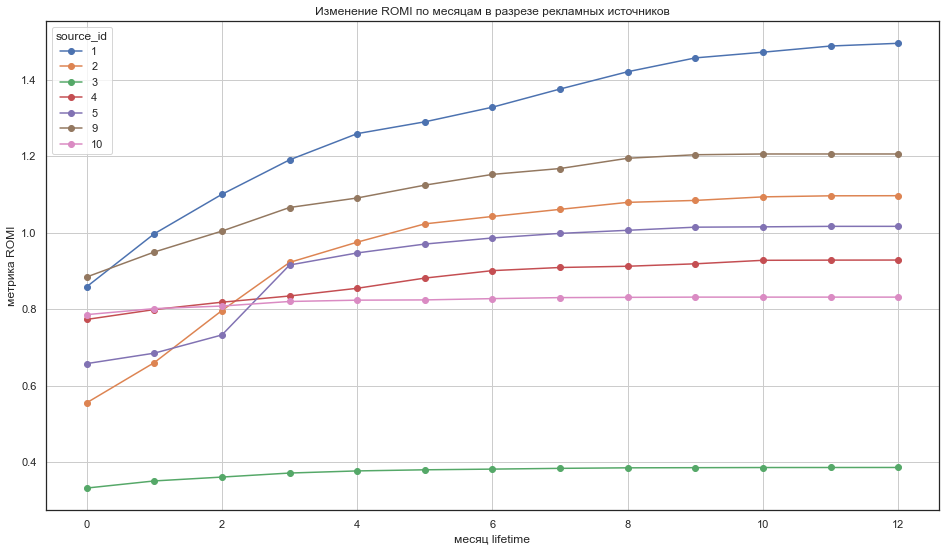

In [363]:
ax = romi.transpose().plot(title = 'Изменение ROMI по месяцам в разрезе рекламных источников', grid = True, \
                           style = '-o', figsize = (16, 9))
ax.set_xlabel('месяц lifetime')
ax.set_ylabel('метрика ROMI')
plt.show()

Больше всего окупаемость у рекламных источников: 1, 2, 9. Не окупаются источники: 3, 4, 10. Низкая окупаемость у источника 5.

<div id='id-section23'/>

### [Вывод](#id-section47)

На все рекламные источники за все время маркетологи потратили 329131.62 млн. руб. 

Больше всего денег было затрачено на рекламные источники: 3, 4, 5. Меньше всего - на рекламные источники: 9, 10.

Затраты на почти все рекламные источники достигали пика в ноябре 2017 (видимо, для того, чтобы привлечь пользователей для новогодних покупок). На источник 4 затраты достигли пика в декабре.
В последующие периоды затраты на маркетинг снижаются.


Самыми дорогими по стоимости привлечения одного покупателя оказались рекламные источники: 3, 2, 5. Причем на источник 3 изначально было затрачено больше всего денег.

Меньше всего по стоимости привлечение покупателей обходится из источников: 10, 9, 4. При этом источник 4 входит в число тех, на которые было затрачено больше всего денег, а на источники 9, 10 - меньше всего денег.


Больше всего окупаемость у рекламных источников: 1, 2, 9. Не окупаются источники: 3, 4, 10. Низкая окупаемость у источника 5.

<div id='id-section24'/>

## [Шаг 6. Общий вывод](#id-section48)

Несмотря на то, что пользователей `desktop` версии больше, чем пользователей `touch` (согласно метрикам **DAW, WAU, MAU**), показатели **sticky factor** практически не отличаются от типа устройств, они за месяц очень низкие - около 4%. 

Кроме того, на двух типах устройств одинаковое среднее число сессий на одного пользователя в день (= 1). Это говорит о том, что пользователи не задерживаются в приложении и на сайте. 

При этом продолжительность сессий на разных типах устройств распределена пропорционально, разницы между платформами не видно. Согласно метрике **ASL**, продолжительность одной сессии равна 1 минуте, что мало. 

Следовательно, развивать и улучшать продукт необходимо в одинаковой степени для двух платформ. 

Больше всего денег было затрачено на рекламные источники: 3, 4, 5. Меньше всего - на рекламные источники: 9, 10.

Согласно метрике **CAC**, cамыми дорогими по стоимости привлечения одного покупателя оказались рекламные источники: 3, 2, 5. Учитывая, что на источник 3 изначально было затрачено больше всего денег, мы будем считать его неэффективным.

Меньше всего по стоимости привлечение покупателей обходится из источников: 10, 9, 4. При этом источник 4 входит в число тех, на которые было затрачено больше всего денег, а на источники 9, 10 - меньше всего денег. 

Согласно **ROMI**, больше всего окупаемость у рекламных источников: 1, 2, 9. Не окупаются источники: 3, 4, 10. Низкая окупаемость у источника 5.

Таким образом, **самыми эффективными источниками** мы считаем: 1, 2, 9 (в него следует вкладывать больше денег, и тогда он может принести большую окупаемость).

**Неэффективными источниками** мы считаем: 3, 4, так как затраты на них самые большие, а окупаемости нет. 

**Обратить внимание** необходимо на источник 5 (затраты на него одни из самых больших, он один из cамых дорогих по стоимости привлечения одного покупателя, а окупаемость у него низкая), а также на источник 10 (на него было затрачено меньше всего денег, возможно, при увеличении финансирования он начнет окупаться).